# **South Asisn Churn Data Analytics And Model selection using TPOT**

In [ ]:
#Importing libraries 
import os
#Importing pandas for data manipulation and analysis
import pandas as pd
#Importing numpy to be able to perform mathematical operations on arrays 
import numpy as np
#Importing sklearn to access various machine learning algorithms
import sklearn
#pyplot makes matplotlib work like MATLAB 
import matplotlib.pyplot as plt
#Seaborn is a data visualization library based on matplotlib
import seaborn as sns
#Importing some packages from sklearn.preprocessing to change raw feature vectors into a representation that is more standard so that lerning algorithms can benefit from it
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
#UPLOADING THE DATASET 
df=pd.read_csv("SATO.csv")
df.head()
 

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_Calls,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,Aggregate_complaint_count,aug_user_type,sep_user_type,aug_fav_a,sep_fav_a,Class
0,1914,1592.7200,23.26,2.5,1.161130e+01,375,25523,99000,1,2G,2G,telenor,mobilink,Churned
1,2073,1404.1496,174.45,27.5,2.531725e+03,389,14584,77299,1,2G,2G,mobilink,ufone,Churned
2,3139,85.5504,14.34,5.0,2.913306e+04,15,477,4194,1,Other,Other,ptcl,telenor,Churned
3,139,2315.2292,19.25,52.5,2.674413e+05,636,50316,52400,2,2G,2G,telenor,ufone,Active
4,139,227.8620,2.95,42.5,1.461621e+06,17,2568,1701,1,NaN,NaN,mobilink,ufone,Active


##                                                    EXPLORATORY DATA ANALYSIS

In [ ]:
#EXPLOARTORY DATA ANALYSIS  
df.describe()

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_Calls,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,Aggregate_complaint_count
count,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000
mean,1469.554500,905.020106,31.108605,58.806080,2.773961e+06,240.910500,7411.284500,16457.577500,1.924500
std,1286.753291,1151.308507,57.908418,247.459279,8.845272e+06,369.922258,16494.392836,34311.972061,2.265693
min,-8.000000,4.910000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.000000,1.000000
25%,323.500000,247.149600,3.500000,1.250000,2.675567e+03,25.000000,114.000000,1432.000000,1.000000
50%,1194.500000,606.575000,14.810000,13.750000,1.822864e+05,99.000000,1940.500000,5039.000000,1.000000
75%,2247.250000,1220.045000,34.140000,53.750000,1.544505e+06,331.250000,7941.000000,15790.000000,2.000000
max,5451.000000,24438.830000,873.980000,8295.000000,1.550312e+08,5727.000000,381174.000000,431440.000000,49.000000


network_age                    0
Aggregate_Total_Rev            0
Aggregate_SMS_Rev              0
Aggregate_Data_Rev             0
Aggregate_Data_Vol             0
Aggregate_Calls                0
Aggregate_ONNET_REV            0
Aggregate_OFFNET_REV           0
Aggregate_complaint_count      0
aug_user_type                245
sep_user_type                206
aug_fav_a                      1
sep_fav_a                      1
Class                          0
dtype: int64

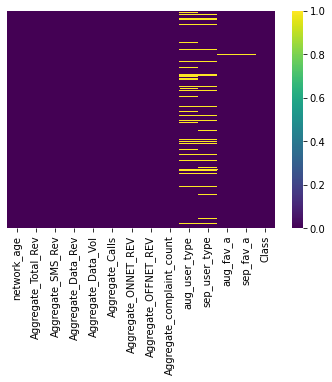

In [ ]:
#Creating a heatmap through seaboen to check where are we missing data
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')


#Check for total number of missing data(Null values)
df.isna().sum()

In [ ]:
#Removing one row that has null value of Favorite Other Network for august and september
from numpy import nan
df['aug_fav_a'] = df['aug_fav_a'].replace(0,nan)
df = df.dropna(axis=0, subset=['aug_fav_a'])
df.isna().sum()

network_age                    0
Aggregate_Total_Rev            0
Aggregate_SMS_Rev              0
Aggregate_Data_Rev             0
Aggregate_Data_Vol             0
Aggregate_Calls                0
Aggregate_ONNET_REV            0
Aggregate_OFFNET_REV           0
Aggregate_complaint_count      0
aug_user_type                245
sep_user_type                206
aug_fav_a                      0
sep_fav_a                      0
Class                          0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


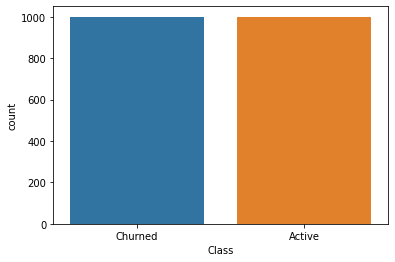

In [ ]:
#Visualize the count of customer churn
sns.countplot(df['Class'])

In [ ]:
#Get customer churn count
df['Class'].value_counts()

Churned    1000
Active     1000
Name: Class, dtype: int64

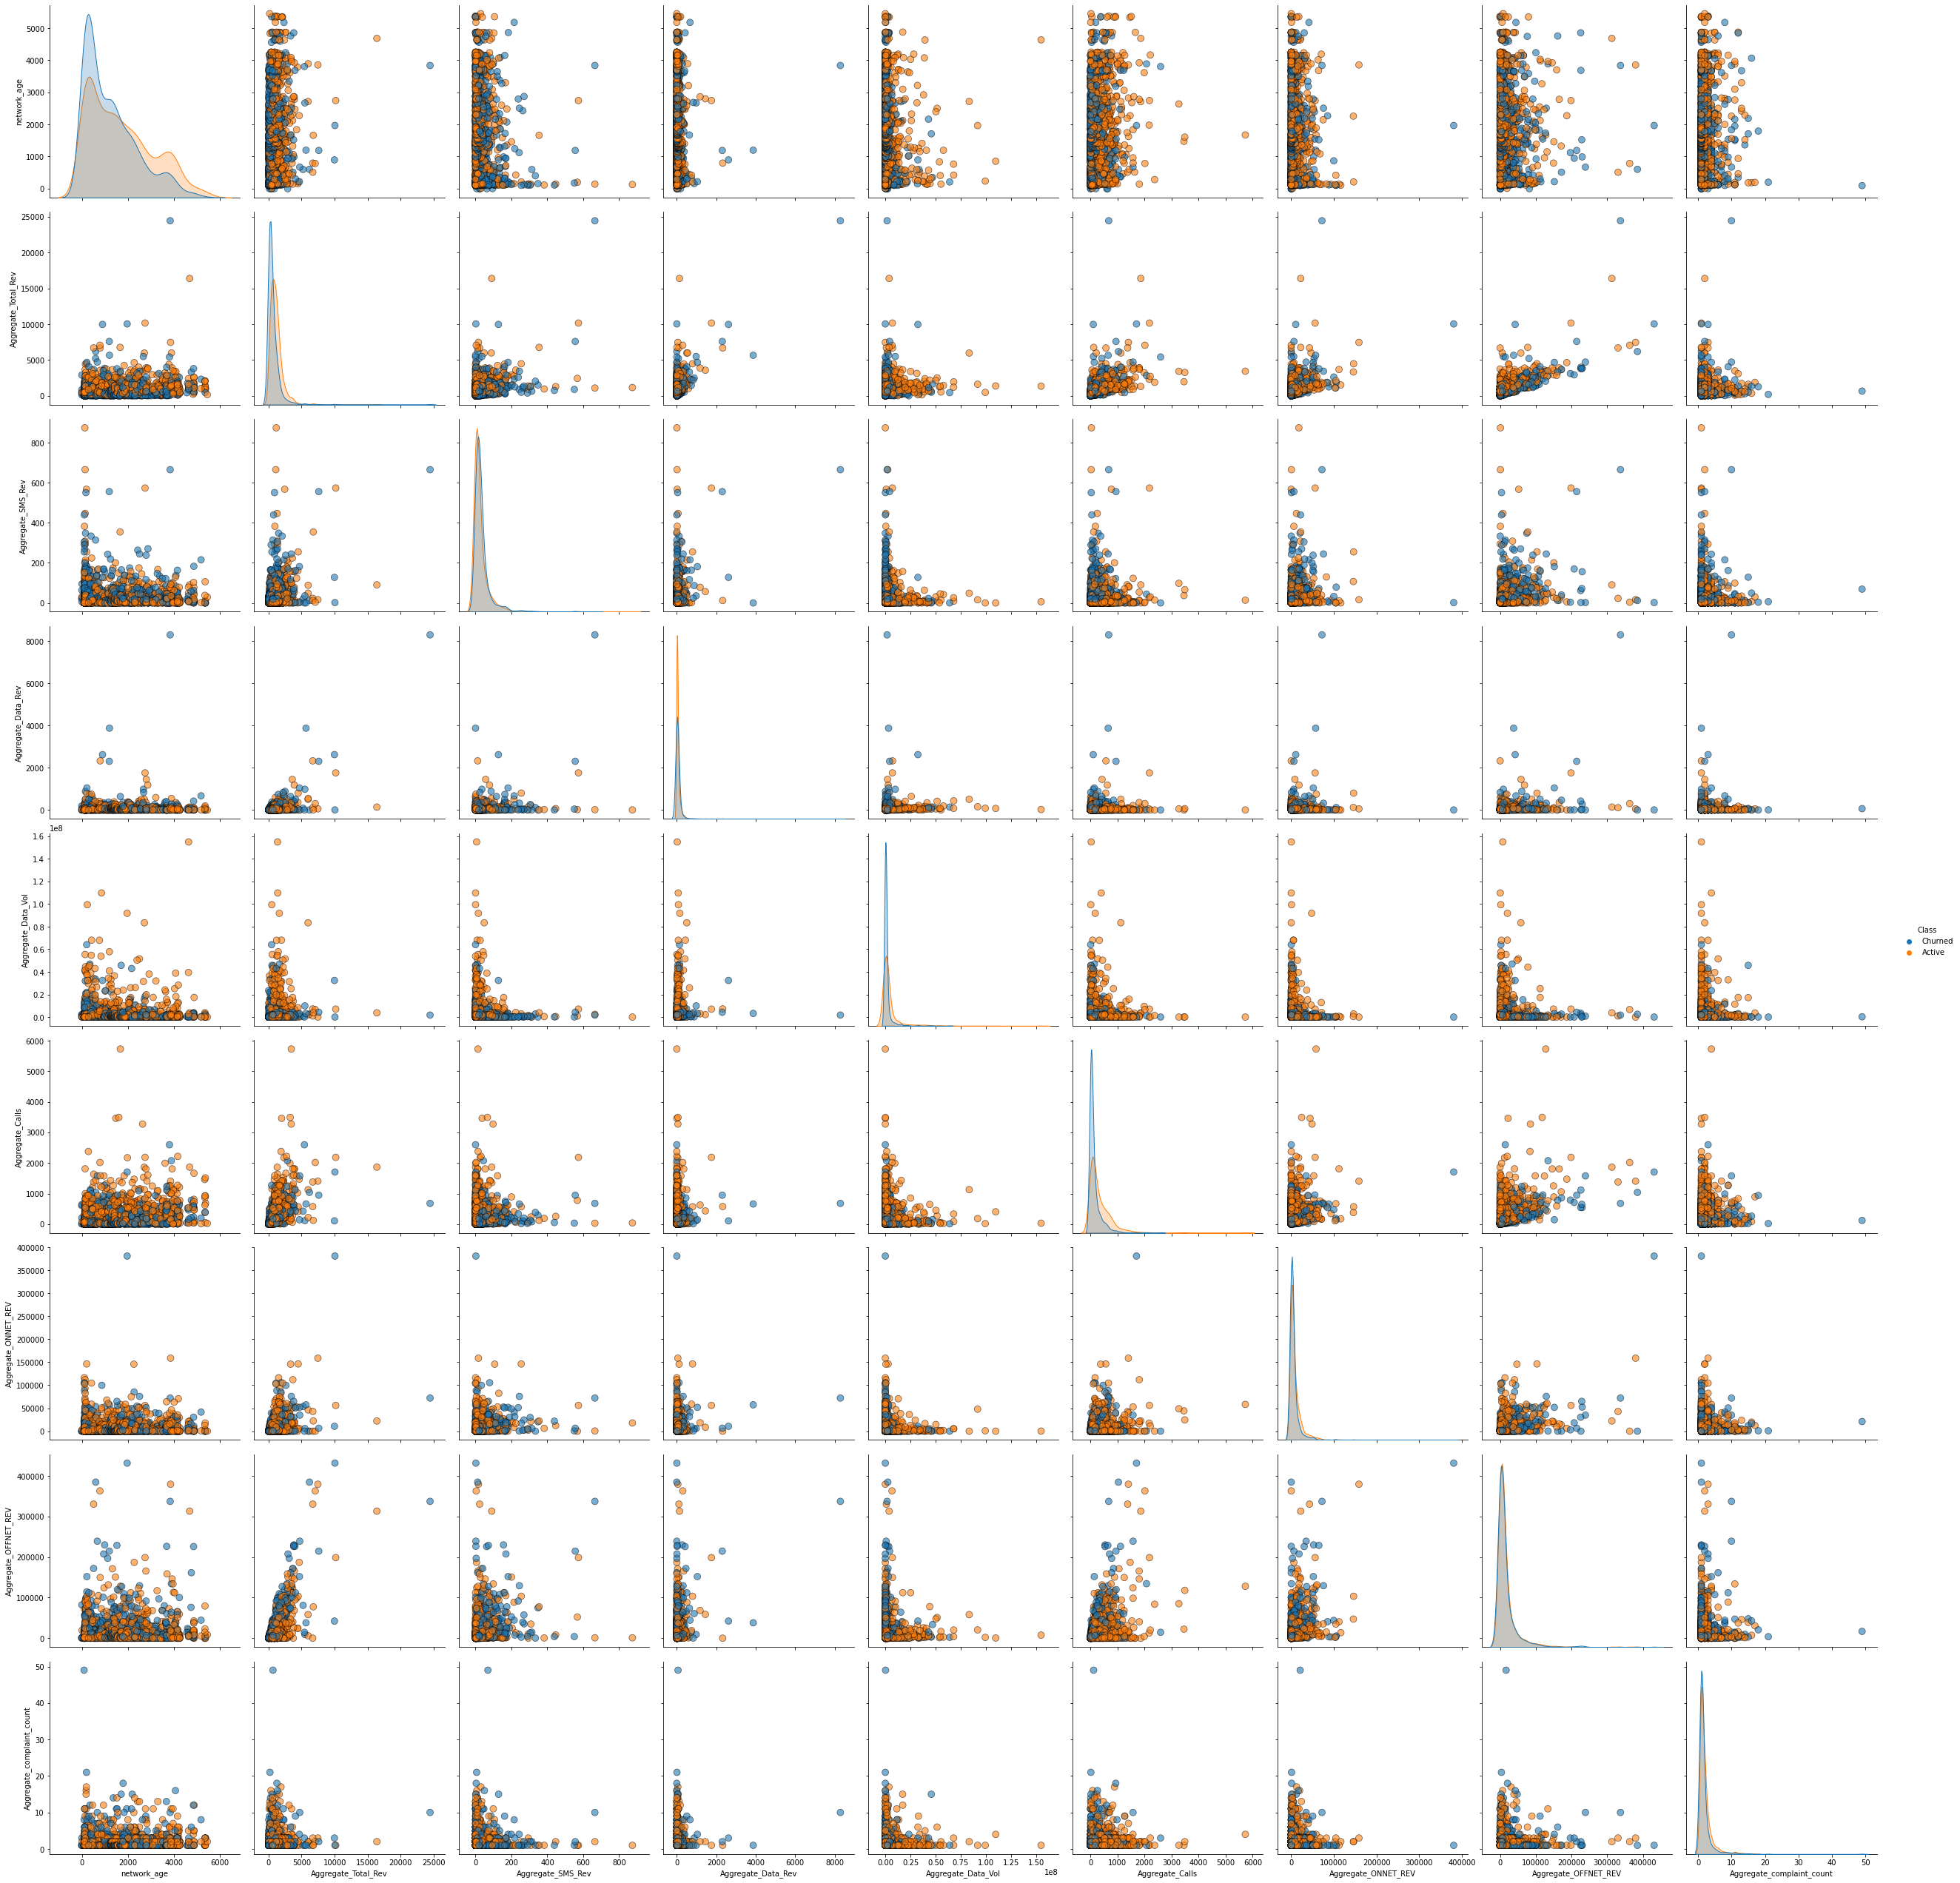

In [ ]:
#EXPLORATORY DATA ANALYSIS
#Plotting to visually analyse relation of all the features with each other
sns.pairplot(df, hue = 'Class',diag_kind ='kde',
             plot_kws = {'alpha': 0.6, 's':80,'edgecolor': 'k'},
                        height=4)

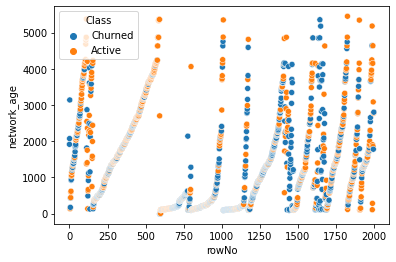

In [ ]:
#CONSIDERING AND PLOTTING ONLY THOSE FEATURES WHICH ARE LIKELY TO HAVE MORE IMPACT ON CLASS
#Plotting to viually alalyse relation between Network age and class
df_copy = df.copy()
df_copy['rowNo'] = np.arange(len(df_copy))
sns.scatterplot(x='rowNo', y='network_age',hue='Class', data=df_copy)

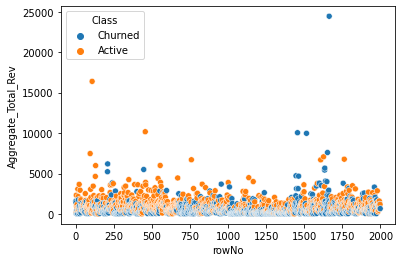

In [ ]:
#Plotting to visually analyse relation between aggrigate total revenue and class
sns.scatterplot(x='rowNo', y='Aggregate_Total_Rev',hue='Class', data=df_copy)

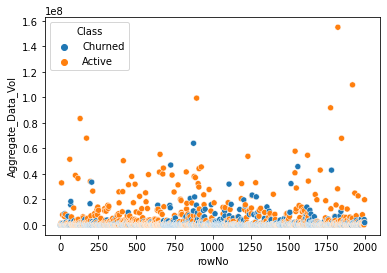

In [ ]:
#Plotting to visually analyse relation between aggregate data volume and class
sns.scatterplot(x='rowNo', y='Aggregate_Data_Vol',hue='Class', data=df_copy)

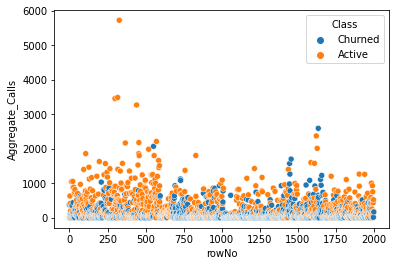

In [ ]:
#Plotting to visually analyse relation between aggregate calls and class
sns.scatterplot(x='rowNo', y='Aggregate_Calls',hue='Class', data=df_copy)

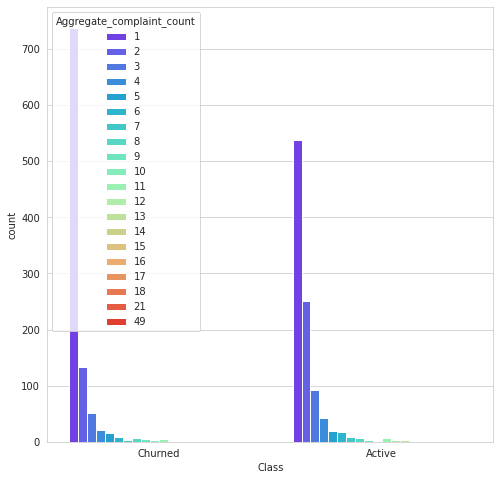

In [ ]:
#Checking for the relation between complaints and churning
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
sns.countplot(x='Class',hue='Aggregate_complaint_count',data=df,palette='rainbow')

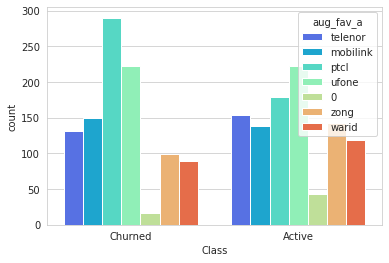

In [ ]:
#Checking relation between  which other network or operator the subscribers makes the most of the calls to and class in august
sns.set_style('whitegrid')
sns.countplot(x='Class',hue='aug_fav_a',data=df,palette='rainbow')

#Checking relation between  which other network or op

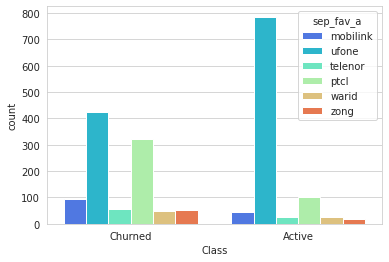

In [ ]:
#Checking relation between  which other network or operator the subscribers makes the most of the calls to and class in september
sns.set_style('whitegrid')
sns.countplot(x='Class',hue='sep_fav_a',data=df,palette='rainbow')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f23933e10>,
      dtype=object)

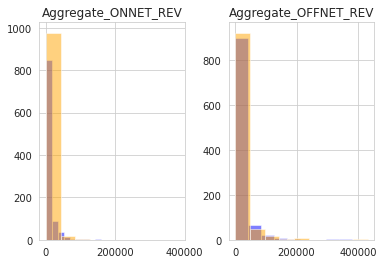

In [ ]:
numerical_features =['Aggregate_ONNET_REV','Aggregate_OFFNET_REV']
fig, ax = plt.subplots(1, 2)
df[df.Class == 'Active'][numerical_features].hist(bins=9,color='blue',alpha=0.5,ax=ax)
df[df.Class == 'Churned'][numerical_features].hist(bins=9,color='orange',alpha=0.5,ax=ax)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f23783c88>,
      dtype=object)

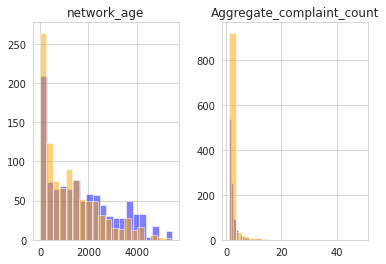

In [ ]:
numerical_features =['network_age','Aggregate_complaint_count']
fig, ax = plt.subplots(1, 2)
df[df.Class == 'Active'][numerical_features].hist(bins=20,color='blue',alpha=0.5,ax=ax)
df[df.Class == 'Churned'][numerical_features].hist(bins=20,color='orange',alpha=0.5,ax=ax)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f2371a160>,
      dtype=object)

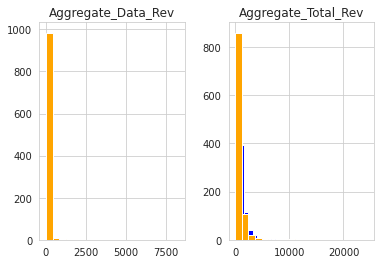

In [ ]:
numerical_features =['Aggregate_Data_Rev','Aggregate_Total_Rev']
fig, ax = plt.subplots(1, 2)
df[df.Class == 'Active'][numerical_features].hist(bins=20,color='blue',alpha=1,ax=ax)
df[df.Class == 'Churned'][numerical_features].hist(bins=20,color='orange',alpha=1,ax=ax)

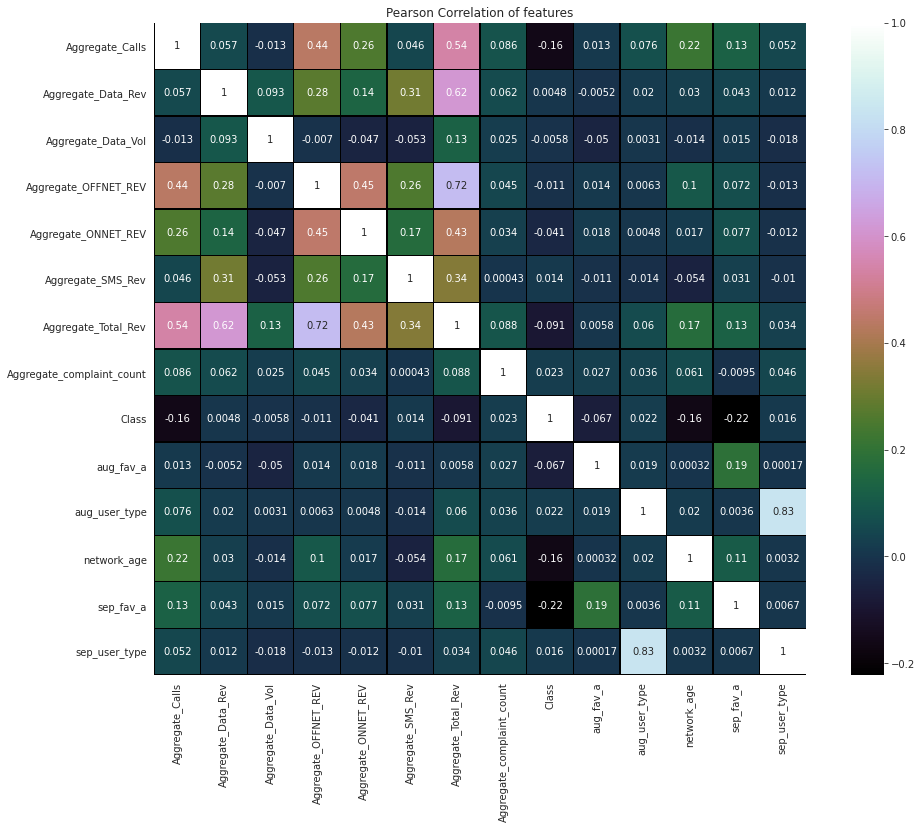

In [ ]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list) 
# Create Dataframe containing only numerical features
df_num = df[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(df_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

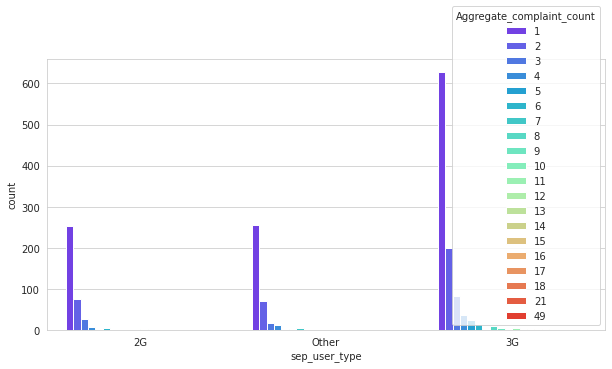

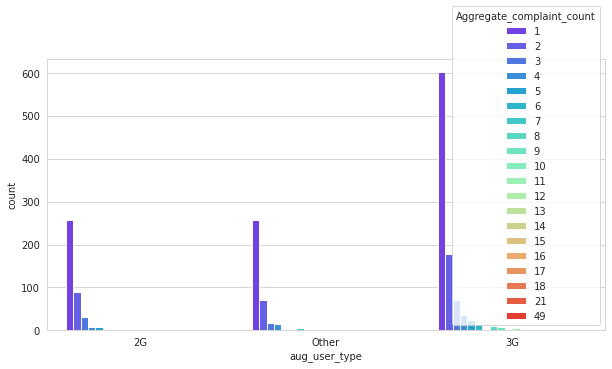

In [ ]:
#Deriving relation between user type and aggregate complaint count
#SEPTEMBER
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(x='sep_user_type',hue='Aggregate_complaint_count',data=df,palette='rainbow')
#August
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(x='aug_user_type',hue='Aggregate_complaint_count',data=df,palette='rainbow')

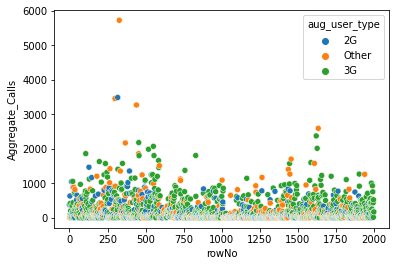

In [ ]:
#Plotting to visually analyse relation between aggrigate total revenue and class
sns.scatterplot(x='rowNo', y='Aggregate_Calls',hue='aug_user_type', data=df_copy)

## Handling Mssing Values

In [ ]:
df.dtypes

network_age                    int64
Aggregate_Total_Rev          float64
Aggregate_SMS_Rev            float64
Aggregate_Data_Rev           float64
Aggregate_Data_Vol           float64
Aggregate_Calls                int64
Aggregate_ONNET_REV            int64
Aggregate_OFFNET_REV           int64
Aggregate_complaint_count      int64
aug_user_type                 object
sep_user_type                 object
aug_fav_a                     object
sep_fav_a                     object
Class                         object
dtype: object

In [ ]:
#Converting object type to category type
df["aug_user_type"] = df["aug_user_type"].astype('category')
df.dtypes

df["sep_user_type"] = df["sep_user_type"].astype('category')
df.dtypes

df["aug_fav_a"] = df["aug_fav_a"].astype('category')
df.dtypes

df["sep_fav_a"] = df["sep_fav_a"].astype('category')
df.dtypes

df["Class"] = df["Class"].astype('category')
df.dtypes

network_age                     int64
Aggregate_Total_Rev           float64
Aggregate_SMS_Rev             float64
Aggregate_Data_Rev            float64
Aggregate_Data_Vol            float64
Aggregate_Calls                 int64
Aggregate_ONNET_REV             int64
Aggregate_OFFNET_REV            int64
Aggregate_complaint_count       int64
aug_user_type                category
sep_user_type                category
aug_fav_a                    category
sep_fav_a                    category
Class                        category
dtype: object

In [ ]:
#label encoding categorical data
df["aug_user_type"] = df["aug_user_type"].cat.codes
df.head(7)

df["sep_user_type"] = df["sep_user_type"].cat.codes
df.head(7)

df["aug_fav_a"] = df["aug_fav_a"].cat.codes
df.head(7)

df["sep_fav_a"] = df["sep_fav_a"].cat.codes
df.head(7)

df["Class"] = df["Class"].cat.codes
df.head(7)

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_Calls,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,Aggregate_complaint_count,aug_user_type,sep_user_type,aug_fav_a,sep_fav_a,Class
0,1914,1592.7200,23.26,2.5,1.161130e+01,375,25523,99000,1,0,0,3,0,1
1,2073,1404.1496,174.45,27.5,2.531725e+03,389,14584,77299,1,0,0,1,3,1
2,3139,85.5504,14.34,5.0,2.913306e+04,15,477,4194,1,2,2,2,2,1
3,139,2315.2292,19.25,52.5,2.674413e+05,636,50316,52400,2,0,0,3,3,0
4,139,227.8620,2.95,42.5,1.461621e+06,17,2568,1701,1,-1,-1,1,3,0
5,143,973.9664,21.86,22.5,9.208711e+05,421,4032,15476,1,1,1,1,3,0
6,174,457.6752,96.93,12.5,1.915703e+02,114,708,22437,1,1,1,4,0,1


In [ ]:
df1=df.copy()

In [ ]:
#DROPPING UNWANTED COLUMNS
unwantedcolumnlist=["sep_user_type"]

In [ ]:
df1 = df1.drop(unwantedcolumnlist, axis=1)

In [ ]:
#Convert all of the non-numeric columns to numeric
for column in df1.columns:
    if df1[column].dtype == np.int:
        continue
        df1[column] = LabelEncoder().fit_transform(df1[column])

In [ ]:
#HANDLING MISSING VALUES STATISTICALLY
def impute_aug_user_type(cols):
    aug_user_type = cols[0]
    Aggregate_complaint_count =cols[1]
   
    if pd.isnull(aug_user_type):
        
        if Aggregate_complaint_count == 4:
            return '2'
        
        elif Aggregate_complaint_count>4:
            return '0'
        
        elif Aggregate_complaint_count<4:
                return '1'
    
    else:
        return aug_user_type

In [ ]:
df1['aug_user_type']= df1[['aug_user_type','Aggregate_complaint_count']].apply(impute_aug_user_type,axis=1)

network_age                  0
Aggregate_Total_Rev          0
Aggregate_SMS_Rev            0
Aggregate_Data_Rev           0
Aggregate_Data_Vol           0
Aggregate_Calls              0
Aggregate_ONNET_REV          0
Aggregate_OFFNET_REV         0
Aggregate_complaint_count    0
aug_user_type                0
aug_fav_a                    0
sep_fav_a                    0
Class                        0
dtype: int64

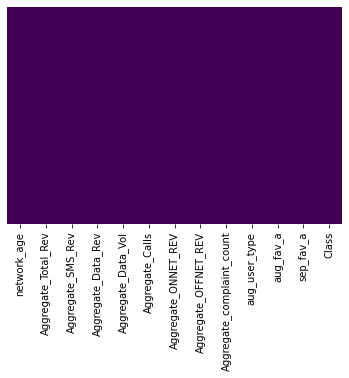

In [ ]:
#CHECKING IF ALL THE MISSING VALUES HAVE BEEN HANDLED
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

df1.isna().sum()

In [ ]:
df1.dtypes

network_age                    int64
Aggregate_Total_Rev          float64
Aggregate_SMS_Rev            float64
Aggregate_Data_Rev           float64
Aggregate_Data_Vol           float64
Aggregate_Calls                int64
Aggregate_ONNET_REV            int64
Aggregate_OFFNET_REV           int64
Aggregate_complaint_count      int64
aug_user_type                  int64
aug_fav_a                       int8
sep_fav_a                       int8
Class                           int8
dtype: object

In [ ]:
df1.shape

(1999, 13)

In [ ]:
#PREPARING MODEL FOR CHURN PREDICTION
X = df1.iloc[:, 0:12].values
y = df1.iloc[:, 12].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn  import ensemble
adaboost =ensemble.AdaBoostClassifier()
adaboost.fit(X_train, y_train)

from sklearn  import ensemble
gboost =ensemble.GradientBoostingClassifier()
gboost.fit(X_train, y_train)

from sklearn.svm import SVC
svc_cl = SVC(kernel = 'rbf', random_state = 0)
svc_cl.fit(X_train, y_train)

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(random_state = 0)
logistic_reg.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)


from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'


acc_adb = cross_val_score(estimator = adaboost, X = X_train, y = y_train, cv = kfold, scoring=scoring)
acc_adb.mean()


acc_gbbost = cross_val_score(estimator = gboost, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_gbbost.mean()

acc_dec1 = cross_val_score(estimator = decision_tree, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_dec1.mean()

acc_gaussion1 = cross_val_score(estimator = gaussian, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_gaussion1.mean()

acc_knn1 = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_knn1.mean()

acc_random1 = cross_val_score(estimator = random_forest, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_random1.mean()

acc_log_reg1 = cross_val_score(estimator = logistic_reg, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_log_reg1.mean()

acc_sgd1 = cross_val_score(estimator = sgd, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_sgd1.mean()

acc_svc1 = cross_val_score(estimator = svc_cl, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_svc1.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

0.5804059609455292

In [ ]:
models_cross = pd.DataFrame({
    'Model': ['AdaBoost','GradientBoosting','Support Vector Machines','Stochastic Gradient Decent','Logistic Regression', 
              'Random Forest','Decision Tree', 'Guassian Naive Bayes', 'Kneighbours'],
    'Score': [acc_adb.mean(),acc_gbbost.mean(),acc_svc1.mean(),acc_sgd1.mean(), acc_log_reg1.mean(), 
              acc_random1.mean(),acc_dec1.mean(), acc_gaussion1.mean(), acc_knn1.mean()]})
    
models_cross.sort_values(by='Score', ascending=False)



,Model,Score
1,GradientBoosting,0.749137
0,AdaBoost,0.744090
5,Random Forest,0.719106
6,Decision Tree,0.671197
4,Logistic Regression,0.622580
7,Guassian Naive Bayes,0.620457
2,Support Vector Machines,0.580406
8,Kneighbours,0.573983
3,Stochastic Gradient Decent,0.522523


In [ ]:
!pip install tpot

     |████████████████████████████████| 92kB 5.6MB/s 
     |████████████████████████████████| 157.5MB 85kB/s 
     |████████████████████████████████| 163kB 47.4MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11957 sha256=b19f993497551d3150d7c8d01e5fe6349df7271db00893db577276958d773ba0
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
df2 = df1.rename(columns={'Class': 'target'})
print(df1.rename(columns={'Class': 'target'}))

      network_age  Aggregate_Total_Rev  ...  sep_fav_a  target
0            1914            1592.7200  ...          0       1
1            2073            1404.1496  ...          3       1
2            3139              85.5504  ...          2       1
3             139            2315.2292  ...          3       0
4             139             227.8620  ...          3       0
...           ...                  ...  ...        ...     ...
1995         3085             884.9700  ...          3       0
1996         1779            1219.9000  ...          1       1
1997         2774             652.6300  ...          3       0
1998         2796            1179.3900  ...          3       0
1999         2802             665.3180  ...          1       1

[2000 rows x 12 columns]


In [ ]:
churn_df_X = df2.drop("target", axis=1)
churn_df_y = df2['target']

In [ ]:
churn_df_X.dtypes

network_age                    int64
Aggregate_Total_Rev          float64
Aggregate_SMS_Rev            float64
Aggregate_Data_Rev           float64
Aggregate_Data_Vol           float64
Aggregate_Calls                int64
Aggregate_ONNET_REV            int64
Aggregate_OFFNET_REV           int64
Aggregate_complaint_count      int64
aug_fav_a                       int8
sep_fav_a                       int8
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(churn_df_X, churn_df_y, train_size=0.70, test_size=0.30)

In [ ]:
import multiprocessing

if __name__ == '__main__':
    multiprocessing.set_start_method('forkserver', force=True)
    tpot =  TPOTClassifier(generations=5, population_size=30, scoring= "accuracy", verbosity=3,n_jobs = 20, random_state=50)
    tpot.fit(X_train, y_train)

32 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:

-1	0.9992857142857143	XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.5, XGBClassifier__max_depth=4, XGBClassifier__min_child_weight=7, XGBClassifier__n_estimators=100, XGBClassifier__n_jobs=1, XGBClassifier__subsamp

In [ ]:
print(tpot.score(X_test, y_test))

1.0


In [ ]:
tpot.export('tpot_churn_pipeline.py')

In [ ]:
tpot.fitted_pipeline_

Pipeline(memory=None,
         steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.5,
                               max_delta_step=0, max_depth=4,
                               min_child_weight=7, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=1, num_parallel_tree=1,
                               objective='multi:softprob', random_state=50,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=0.9500000000000001,
                               tree_method='exact', use_label_encoder=True,
                               validate_param